In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [2]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
print(train_df.head())
print(train_df.isnull().sum().sort_values(ascending=False)[:])

#Print only number columns
#print(train_df.describe(include=[np.number]))
#Print only object columns
#print(train_df.describe(include=[np.object]))
#Print all columns
#print(train_df.describe(include='all'))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
Ca

In [3]:
test_df.isnull().sum().sort_values(ascending=False)

Cabin          327
Age             86
Fare             1
Embarked         0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
PassengerId      0
dtype: int64

In [4]:
total_data = pd.concat((train_df, test_df), sort=False)
#print(total_data.info())

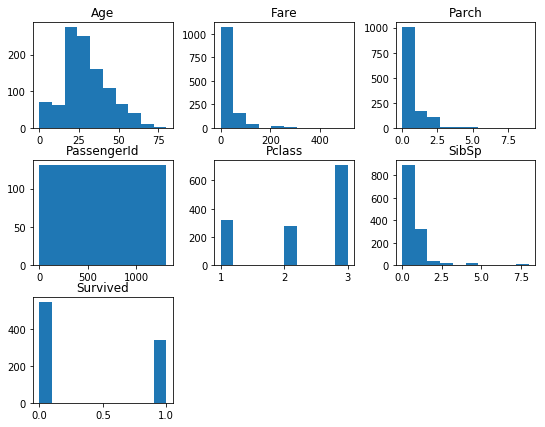

In [5]:
total_data.hist(bins=10,figsize=(9,7),grid=False);

## Handling missing Values

In [6]:

train_df[train_df['Embarked'].isnull()]

train_df["Embarked"] = train_df.fillna(train_df["Embarked"].mode()[0])

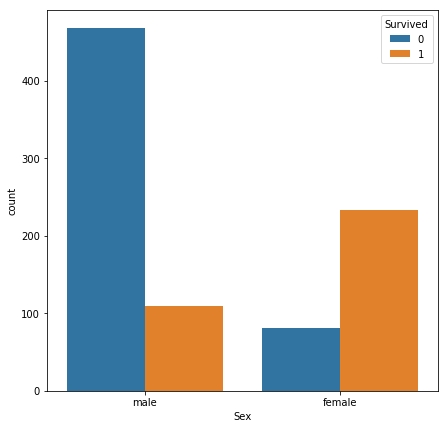

In [7]:
plt.figure(figsize=(7,7))
sns.countplot(data=train_df,x='Sex',hue='Survived')

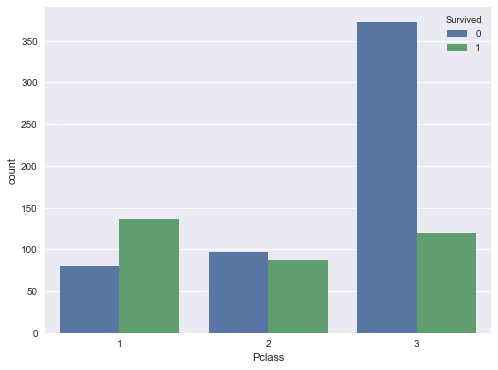

In [8]:
plt.figure(figsize=(8,6))
plt.style.use('seaborn')
sns.countplot(data=train_df,x='Pclass', hue = 'Survived')

In [33]:
import re

pattern = re.compile(r' ([A-Za-z]+)\.')

print(pattern.search('Heikkinen, Miss. Laina').group(1))

for df in train_df:
    train_df['Title'] = pattern.search(df['Name'].asType(str)).group(1)
    
print(train_df['Name'].head())

for df in test_df['Name']:
    test_df['Title'] = pattern.search(df).group(1)
    
print(train_df['Title'].head())

Miss


TypeError: string indices must be integers

In [28]:
train_df['Title'].value_counts()

Mr    891
Name: Title, dtype: int64